# Regression Problems

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
X = tips_df.drop(['tip'], axis = 1)
y = tips_df['tip']

In [6]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [7]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [8]:
numerical = X.drop(['sex','smoker','day','time'], axis = 1)
categorical = X[['sex','smoker','day','time']]
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [9]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


In [10]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#scale training dataset
X_train = sc.fit_transform(X_train)
#scale test dataset
X_test = sc.transform(X_test)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

#train algorithm
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [14]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.7080218832979829
Mean Squared Error:  0.893919522160961
Root Mean Squared Error:  0.9454731736865732


# KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
regressor = knn_reg.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [16]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.7513877551020406
Mean Squared Error:  0.9462902040816326
Root Mean Squared Error:  0.9727744877830794


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state = 42, n_estimators = 500)
regressor = rf_reg.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [18]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.7045665306122448
Mean Squared Error:  0.8020627395265322
Root Mean Squared Error:  0.8955795551074913


# SVM

In [19]:
from sklearn import svm

svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [20]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.7362521512772694
Mean Squared Error:  0.9684825097223093
Root Mean Squared Error:  0.9841150896731079


In [21]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(regressor, X, y, cv = 5, scoring = 'neg_mean_absolute_error'))

[-0.66386205 -0.57007269 -0.63598762 -0.96960743 -0.87391702]


In [22]:
#predict tip of one datapoint
single_record = sc.transform(X.values[100].reshape(1,-1))
predicted_tip = regressor.predict(single_record)
print(predicted_tip)

[2.70366712]


# Practice with Diamonds dataset

In [23]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
X = diamonds_df.drop(['cut'], axis = 1)
X.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
y = diamonds_df['cut']
y.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [26]:
numerical = X.drop(['color','clarity'], axis = 1)
categorical = X[['color','clarity']]
cat_numerical = pd.get_dummies(categorical,drop_first=True)
y = pd.get_dummies(y, drop_first = True)
cat_numerical.head()

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0


In [27]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,carat,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,1,0,0,0,0,0,1,0


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [29]:
sc = StandardScaler()
#scale training dataset
X_train = sc.fit_transform(X_train)
#scale test dataset
X_test = sc.transform(X_test)

In [30]:
rf_reg = RandomForestRegressor(random_state = 42, n_estimators = 500)
regressor = rf_reg.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Classification Problems

In [32]:
churn_df = pd.read_csv('customer_churn.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
churn_df = churn_df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [35]:
X = churn_df.drop(['Exited'], axis = 1)
y = churn_df['Exited']

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [38]:
numerical = churn_df.drop(['Geography', 'Gender'], axis = 1)
categorical = churn_df[['Geography','Gender']]

In [39]:
cat_numerical = pd.get_dummies(categorical, drop_first = True)

In [42]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 0)

In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()  
classifier = log_clf.fit(X_train, y_train)  

y_pred = classifier.predict(X_test) 

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1595    0]
 [   0  405]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

1.0


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
classifier = knn_clf.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [70]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1595    0]
 [   0  405]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

1.0


In [71]:
print(cross_val_score(classifier, X, y, cv = 5, scoring = 'accuracy'))

[0.767  0.7655 0.767  0.7645 0.766 ]


# Data Clustering with Machine Learning

# K Means Clustering

In [73]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\baude\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


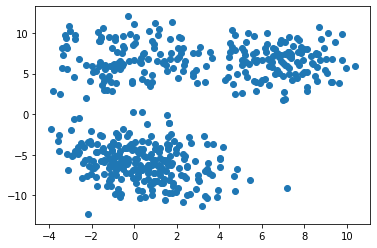

In [74]:
#generate dummy data with 500 records and 4 clusters
features, labels = make_blobs(n_samples = 500, centers = 4, cluster_std = 2.00)

#plot dummy data
plt.scatter(features[:,0], features[:,1])

In [78]:
km_model = KMeans(n_clusters=4)
km_model.fit(features)

KMeans(n_clusters=4)

In [79]:
#print centroid values
print(km_model.cluster_centers_)

[[-0.28973879  6.89712482]
 [-0.49372772 -4.30518816]
 [ 6.84029685  6.50768594]
 [ 1.27716696 -7.84492855]]


In [80]:
#print predicted label vals
print(km_model.labels_)

[3 3 3 2 3 1 0 3 0 1 2 1 1 3 0 1 1 1 3 2 2 0 3 3 3 1 1 2 1 2 1 0 2 3 3 2 0
 1 3 3 0 0 3 2 2 1 1 3 2 1 2 3 3 2 1 1 0 3 1 0 3 1 3 1 3 1 2 3 2 0 1 3 2 0
 0 3 1 2 0 2 1 1 1 0 1 1 3 3 3 3 1 1 0 2 1 3 1 0 2 0 3 3 1 1 3 2 0 3 1 1 2
 2 3 0 1 2 3 1 2 3 1 0 0 0 3 3 0 3 2 3 0 3 3 1 3 2 0 3 3 2 3 3 0 0 1 2 2 0
 2 0 0 3 0 1 2 1 1 3 0 2 2 0 1 0 0 0 3 2 1 1 3 2 3 2 1 2 2 1 0 3 0 3 1 2 0
 0 2 2 3 1 0 1 0 2 0 0 1 2 0 0 2 0 1 0 3 2 3 2 2 3 3 2 3 0 2 2 1 1 0 2 0 0
 0 0 0 2 3 2 0 0 3 3 1 0 0 1 3 3 1 1 3 3 0 0 2 2 0 2 2 0 3 2 1 2 1 2 2 0 1
 1 2 1 3 0 2 0 0 3 1 0 0 1 3 0 0 0 3 2 2 1 1 2 1 3 0 3 2 1 0 3 2 0 1 2 1 1
 0 2 3 1 2 0 0 2 2 1 3 2 1 2 0 0 3 0 3 0 2 0 2 1 3 0 1 0 2 3 3 1 2 0 2 2 1
 2 3 2 0 0 1 1 0 0 1 3 2 3 1 1 1 3 2 0 0 1 0 0 0 0 3 1 0 2 0 1 3 0 2 0 3 3
 0 0 1 3 2 0 2 1 1 2 1 3 2 1 2 2 2 1 2 2 3 3 3 3 2 2 0 1 1 3 2 2 1 2 0 2 1
 3 2 1 1 1 2 2 3 0 1 2 2 1 2 0 0 2 3 3 0 2 3 1 1 3 1 1 2 0 1 1 1 2 2 0 2 2
 1 2 1 1 3 1 2 3 2 1 3 2 1 3 0 1 1 3 1 2 1 2 1 1 1 3 0 2 1 0 0 2 1 2 3 1 0
 0 3 3 3 2 0 1 2 1 1 1 3 

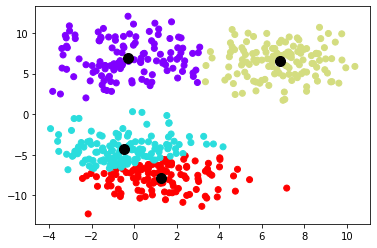

In [81]:
#plot datapoints
plt.scatter(features[:,0],features[:,1],c = km_model.labels_, cmap = 'rainbow')

#plot centroids
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

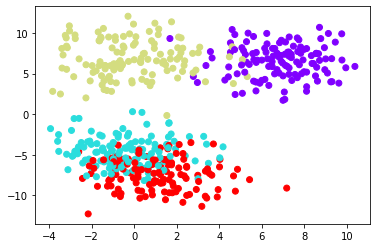

In [90]:
#plot actual datapoints
plt.scatter(features[:,0],features[:,1], c = labels, cmap = 'rainbow')